In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv("data.csv", encoding="latin1")

/var/folders/0n/cb4msb_j7vq0sq7_bpccc2040000gn/T/ipykernel_31314/1591358675.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("data.csv", encoding="latin1")


In [6]:
print(df.head())

  stn_code       sampling_date           state   location agency  \
0    150.0  February - M021990  Andhra Pradesh  Hyderabad    NaN   
1    151.0  February - M021990  Andhra Pradesh  Hyderabad    NaN   
2    152.0  February - M021990  Andhra Pradesh  Hyderabad    NaN   
3    150.0     March - M031990  Andhra Pradesh  Hyderabad    NaN   
4    151.0     March - M031990  Andhra Pradesh  Hyderabad    NaN   

                                 type  so2   no2  rspm  spm  \
0  Residential, Rural and other Areas  4.8  17.4   NaN  NaN   
1                     Industrial Area  3.1   7.0   NaN  NaN   
2  Residential, Rural and other Areas  6.2  28.5   NaN  NaN   
3  Residential, Rural and other Areas  6.3  14.7   NaN  NaN   
4                     Industrial Area  4.7   7.5   NaN  NaN   

  location_monitoring_station  pm2_5        date  
0                         NaN    NaN  1990-02-01  
1                         NaN    NaN  1990-02-01  
2                         NaN    NaN  1990-02-01  
3       

In [7]:
x= df["no2"].dropna().values

In [9]:
r=102317136
ar = 0.05 * (r % 7)
br = 0.3 * (r % 5 + 1)
print(ar)
print(br)

0.25
0.6


In [10]:
z= x + ar * np.sin(br*x)
mu = np.mean(z)
sigma_sq = np.var(z)
lambda_param = 1 / (2 * sigma_sq)
c = np.sqrt(lambda_param / np.pi)
print("mu =", mu)
print("lambda =", lambda_param)
print("c =", c)

mu = 25.81266175882587
lambda = 0.001460577420359888
c = 0.021561916251515552


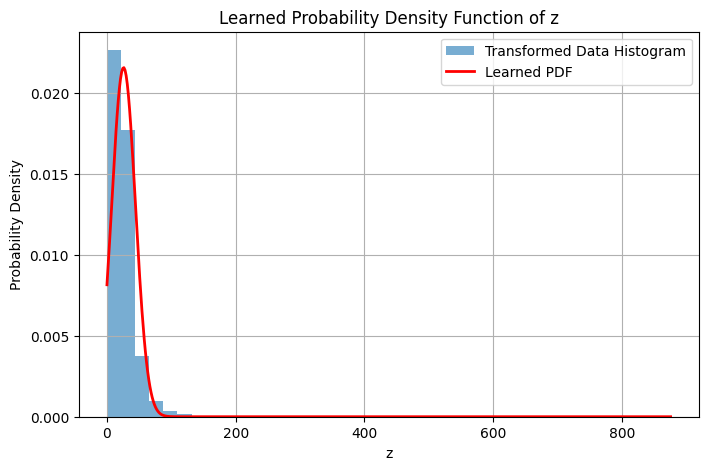

In [11]:
z_range = np.linspace(min(z), max(z), 500)
pdf = c * np.exp(-lambda_param * (z_range - mu)**2)
plt.figure(figsize=(8,5))
plt.hist(z, bins=40, density=True, alpha=0.6, label="Transformed Data Histogram")
plt.plot(z_range, pdf, color="red", linewidth=2, label="Learned PDF")
plt.title("Learned Probability Density Function of z")
plt.xlabel("z")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()